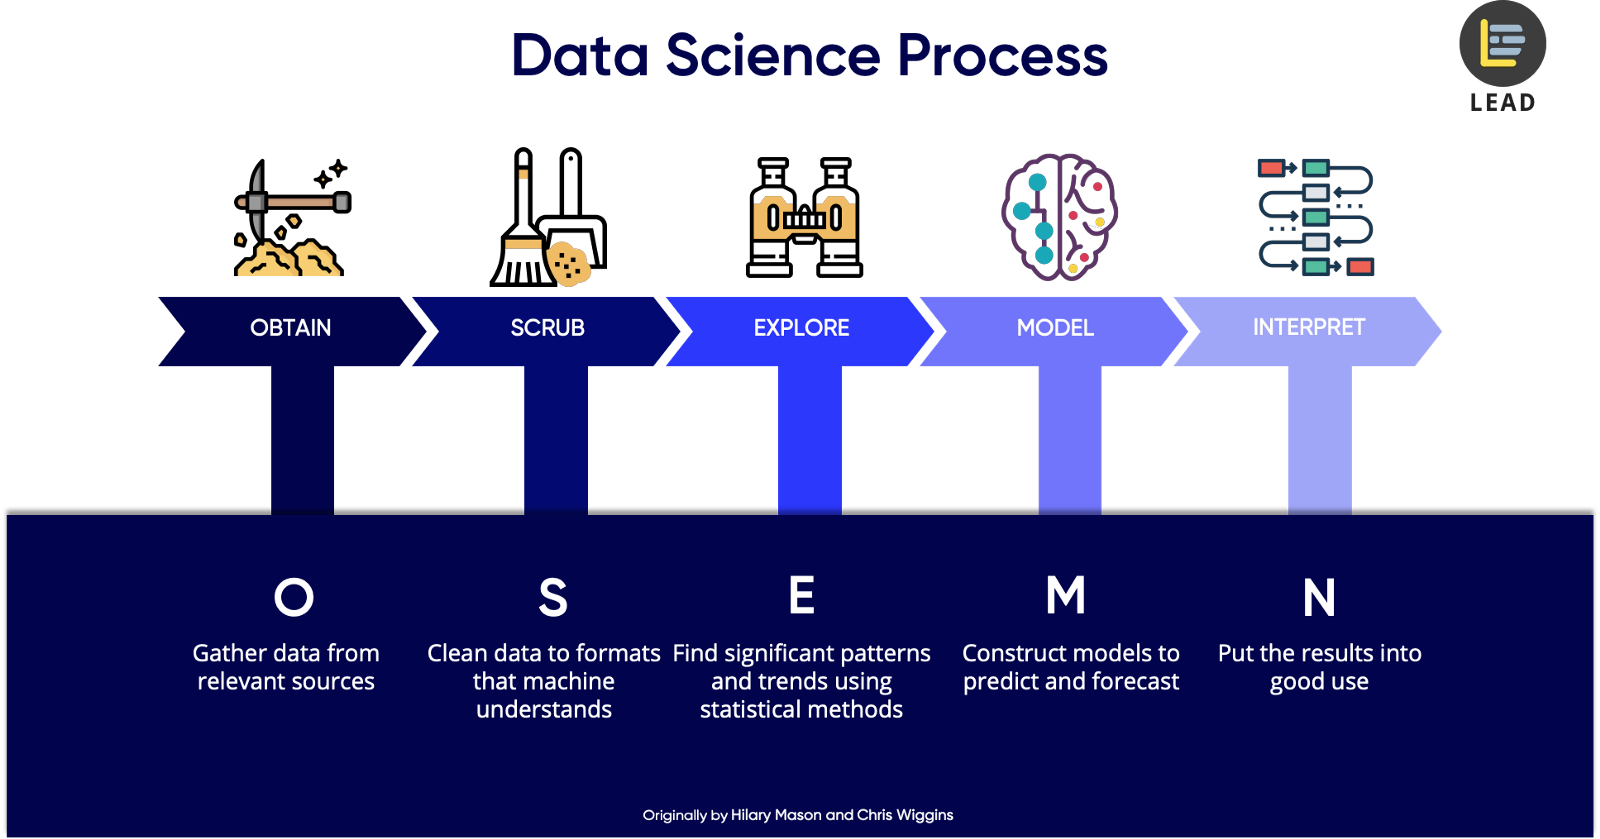

Obtain:

This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem.

Scrub:

During this stage, we'll focus on preprocessing our data. Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage. The line with this stage really blurs with the Explore stage, as it is common to only realize that certain columns require cleaning or preprocessing as a result of the visualzations and explorations done during Step 3.

Note that although technically, categorical data should be one-hot encoded during this step, in practice, it's usually done after data exploration. This is because it is much less time-consuming to visualize and explore a few columns containing categorical data than it is to explore many different dummy columns that have been one-hot encoded.

Explore:

This step focuses on getting to know the dataset you're working with. As mentioned above, this step tends to blend with the Scrub step mentioned above. During this step, you'll create visualizations to really get a feel for your dataset. You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks liek that. If your project is a classification task, you may check the balance of the different classes in your dataset. If your problem is a regression task, you may check that the dataset meets the assumptions necessary for a regression task.

At the end of this step, you should have a dataset ready for modeling that you've thoroughly explored and are extremely familiar with.

Model:

This step, as with the last two frameworks, is also pretty self-explanatory. It consists of building and tuning models using all the tools you have in your data science toolbox. In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results. As with the other stages, it is both common and accepted to realize something, jump back to a previous stage like Scrub or Explore, and make some changes to see how it affects the model.

Interpret:

During this step, you'll interpret the results of your model(s), and communicate results to stakeholders. As with the other frameworks, communication is incredibily important! During this stage, you may come to realize that further investigation is needed, or more data. That's totally fine--figure out what's needed, go get it, and start the process over! If your results are satisfactory to all stakeholders involved, you may also go from this stage right into productionizing your model and automating processes necessary to support it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('seaborn-darkgrid')
%matplotlib inline
import seaborn as sns

# Use seaorn to check for multicollinearity
import seaborn as sns

# Use statsmodels to look at results for each linear regression model 
import statsmodels.formula.api as smf

kc = pd.read_csv('kc_house_data.csv')
print ('Data Shape: ',kc.shape)
kc.head(10)

Data Shape:  (21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


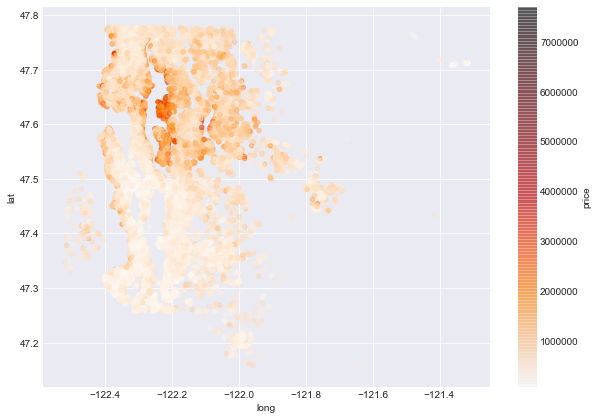

In [2]:
# let’s color code from the most expensive to the least expensive areas:
kc.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(10,7), 
        c="price", cmap="gist_heat_r", colorbar=True, sharex=False);

This image tells us that the most important houses were sold at the waterfront which is to be expected.

Summary of Step 1

We have 21,597 records and 21 columns.
The variable we are going to predict is the price. This is the dependent or target variable.
There are columns with missing data or with wrong data types.
Below is an explanation of each column name (according to kaggle.com)

id = a notation for a house
date = Date house was sold
price = Price is prediction target
bedrooms = Number of Bedrooms/House
bathrooms = Number of bathrooms/bedrooms
sqft_living = square footage of the home
sqft_lot = square footage of the lot
floors = Total floors (levels) in house
waterfront = House which has a view to a waterfront
view = Has been viewed
condition = How good the condition is (Overall)
grade = overall grade given to the housing unit, based on King County grading system
sqft_above = square footage of house apart from basement
sqft_basement = square footage of the basement
yr_built = Built Year
yr_renovated = Year when house was renovated
zipcode = zip
lat = Latitude coordinate
long = Longitude coordinate
sqft_living15 = Living room area in 2015 (implies -- some renovations) This might or might not have affected the lotsize area
sqft_lot15 = lotSize area in 2015 (implies -- some renovations)


2 - Scrubbing the data
2.1 - Subsampling 
2.2 - Dealing with null values
2.3 - Dealing with incorrect data types 
2.4 - Checking for multicollinearity 
2.5 - Remove unnecessary columns

2.1 Subsampling

There is no need to get a subsample of the data because the file is not extensively large.

2.2 - Dealing with null values

In [3]:
# Check for null values in the dataset 
kc.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

View has 63 null values. Because this is not a significant number, these can be dropped from our data

In [4]:
print (kc.view.unique())
print (kc.view.value_counts())

# select only the data for where the view is not a nan value
# convert view to data type string so the 'nan' data can be dropped
kc['view'] = kc.view.astype(str)
kc = kc[kc.view != 'nan']  


[ 0. nan  3.  4.  2.  1.]
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [5]:
# replace null values with 0 in waterfront column and change to data type integer
kc.waterfront = kc.waterfront.fillna(value=0)

# replace null values in yr_renovated with 0 and change to data type integer
kc.yr_renovated = kc.yr_renovated.fillna(value=0)


# Verify that there are not any more null values
kc.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

2.2 - Dealing with datatypes

In [6]:
# check the datatypes of all of the columns
print('\n   Data Types  \n')
print(kc.dtypes)


   Data Types  

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view              object
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [7]:
# The id column is not needed so it can be dropped from the data
kc = kc.drop(['id'], axis=1)
kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
# Start with an initial data type conversion
# For columns that are obviouly categorized wrong, convert them to an appropriate data type
kc['date'] = pd.to_datetime(kc.date)

kc['waterfront'] = kc.waterfront.astype(int)
kc['yr_renovated'] = kc.yr_renovated.astype(int)
kc['view'] = kc.view.astype(float)
kc['view'] = kc.view.astype(int)


In [9]:
# Check columns for unusable data by looking at the unique values for each variable

In [10]:
print ('bedrooms values:', kc.bedrooms.unique())
print ('\nbathroom values:', kc.bathrooms.unique())
print ('\nsquare ft living values:', kc.sqft_living.unique())
print ('\ngrade values:', kc.grade.unique())
print ('\nfloor values:', kc.floors.unique())
print ('\nwaterfront values:', kc.waterfront.unique())
print ('\nview values:', kc.view.unique())
print ('\ncondition values:', kc.condition.unique())
print ('\ngrade values:', kc.grade.unique())
print ('\nyear built values:', kc.yr_built.unique())
print ('\nyear renovated values', kc.yr_renovated.unique())


bedrooms values: [ 3  2  4  5  1  6  7  8  9 11 10 33]

bathroom values: [1.   2.25 3.   2.   4.5  2.5  1.75 2.75 1.5  3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 0.5  5.5  6.75 6.   5.75 8.   7.5  7.75 6.25
 6.5 ]

square ft living values: [1180 2570  770 ... 3087 3118 1425]

grade values: [ 7  6  8 11  9  5 10 12  4  3 13]

floor values: [1.  2.  1.5 3.  2.5 3.5]

waterfront values: [0 1]

view values: [0 3 4 2 1]

condition values: [3 5 4 1 2]

grade values: [ 7  6  8 11  9  5 10 12  4  3 13]

year built values: [1955 1951 1933 1965 1987 2001 1995 1960 2003 1942 1927 1977 1900 1979
 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929 1981
 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991 1954
 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988 1962
 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924 1990
 1914 1926 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943 1957 2004
 1940 1918 1928 1974 1911 1936 1937 1982 1908 

In [11]:
# Use only the values from 1-6 bedrooms
print (kc.bedrooms.value_counts())
kc = kc[kc['bedrooms'] < 7]
kc.bedrooms.unique()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


array([3, 2, 4, 5, 1, 6])

For bathrooms: Values are decimal and calculated as: Full bathrooms (ensuite) = 1 Half bathrooms (separate )= 0.5 Powder rooms (only toilet and sink) = 0.25 (Dahlin, 2016)

In [12]:
print (kc['view'].value_counts())

# A significant majority of the values for the variable view are 0, let's just use a categorical value of 1 for 
# if it has a view and 0 for if it does not have a view.
# https://github.com/matthewsparr/King-County-Sales-Analysis/blob/master/student2.ipynb

kc['has_view'] = kc['view'].apply(lambda row: 1 if row != 0 else 0)
print (kc['has_view'].unique())


0    19371
2      952
3      507
1      327
4      315
Name: view, dtype: int64
[0 1]


In [13]:
(kc.sqft_basement =='?').sum()  # there are 450 '?' in this column
#(kc.sqft_basement == '0.0').sum()  # there are 12798 '0.0' values in this column

# Replace the '?' values with 0 i the sqft_basement data
kc['sqft_basement'] = (kc['sqft_basement'].replace('?', 0)).astype(float)
kc['sqft_basement'] = kc['sqft_basement'].astype(int)

# Instead of square feet values for the basement, let's just use a categorical value of 1 for if it has a basement
# and 0 for if it does not have a basement.
# https://github.com/matthewsparr/King-County-Sales-Analysis/blob/master/student2.ipynb
kc['basement'] = kc['sqft_basement'].apply(lambda row: 0 if row == 0 else 1) 
print(kc['basement'].unique())


[0 1]


In [14]:
# Convert the year built to reflect the age of the house. This format will be easier to visualize
# https://github.com/matthewsparr/King-County-Sales-Analysis/blob/master/student2.ipynb
kc['yr_built'].describe()
kc['age'] = (kc.yr_built.max() - kc.yr_built + 1)
kc = kc.drop(['yr_built'], axis=1)

0       21210
2014       73
2013       30
2007       30
2005       28
2009       21
2006       20
2008       15
2015       14
2010       14
2011        9
2012        8
Name: yr_renovated, dtype: int64


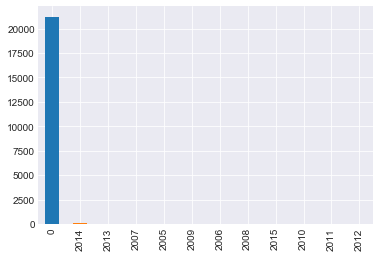

In [15]:
# anything renovated before 2005 is 10 years old already
years = kc.loc[:,'yr_renovated']
for year in years:
    if year < 2005:
        kc['yr_renovated'] = (kc['yr_renovated'].replace(year, 0)).astype(int)
print (kc['yr_renovated'].value_counts())
kc['yr_renovated'].value_counts().plot(kind='bar')

In [16]:
kc.info(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21472 entries, 0 to 21596
Data columns (total 22 columns):
date             21472 non-null datetime64[ns]
price            21472 non-null float64
bedrooms         21472 non-null int64
bathrooms        21472 non-null float64
sqft_living      21472 non-null int64
sqft_lot         21472 non-null int64
floors           21472 non-null float64
waterfront       21472 non-null int64
view             21472 non-null int64
condition        21472 non-null int64
grade            21472 non-null int64
sqft_above       21472 non-null int64
sqft_basement    21472 non-null int64
yr_renovated     21472 non-null int64
zipcode          21472 non-null int64
lat              21472 non-null float64
long             21472 non-null float64
sqft_living15    21472 non-null int64
sqft_lot15       21472 non-null int64
has_view         21472 non-null int64
basement         21472 non-null int64
age              21472 non-null int64
dtypes: datetime64[ns](1), float64(5

/Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


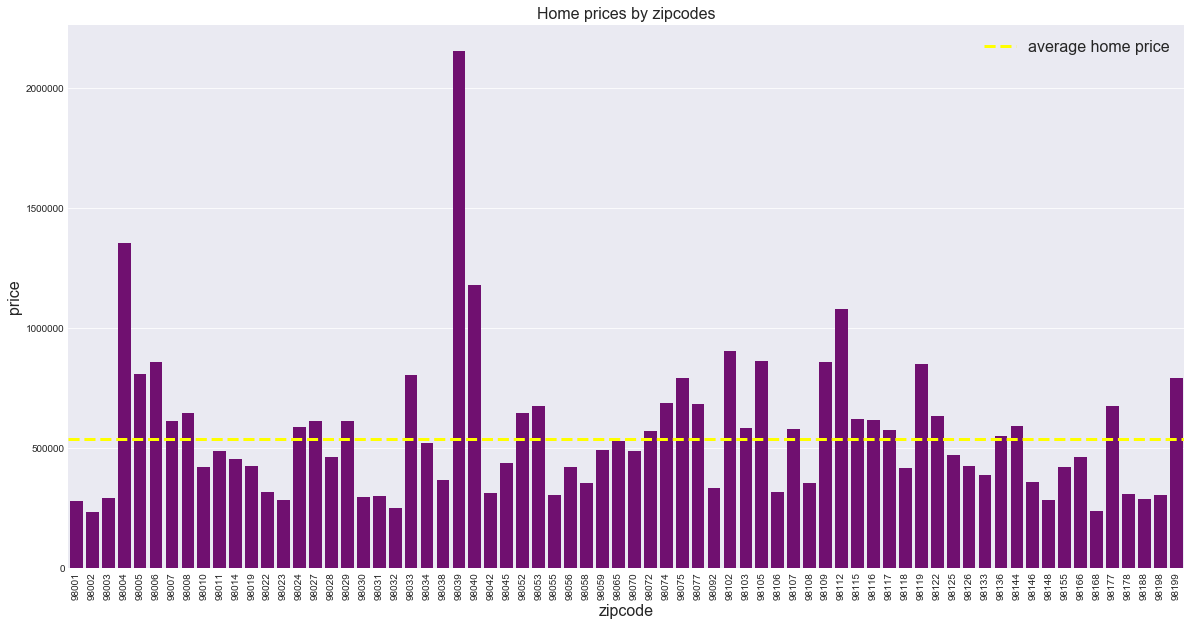

In [17]:
# plot home prices in zipcodes
# https://github.com/stevhliu/predicting-house-sales-price/blob/master/multivariable_linreg.ipynb

f, ax = plt.subplots(figsize = (20, 10))
#sequential_colors = sns.color_palette("RdPu", 10)
sns.barplot(kc['zipcode'], kc['price'], ci = False, color = 'purple')

# draw line for average home price
ax.axhline(y = kc['price'].mean(), color = 'yellow', lw = 3, linestyle = '--', label = 'average home price')

# rotate x-ticks to make it easier to read
plt.xticks(rotation = 90)
plt.title('Home prices by zipcodes', fontsize = 16)
plt.xlabel('zipcode', fontsize = 16)
plt.ylabel('price', fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

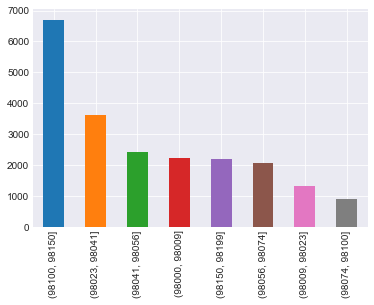

In [18]:
# create bins for zipcode
bins = [98000, 98009, 98023, 98041, 98056, 98074 , 98100 , 98150, 98199]
bins_zip = pd.cut(kc['zipcode'], bins)
bins_zip.value_counts().plot(kind='bar')

# replace the existing zipcode column
kc['zipcode'] = bins_zip
kc['zipcode'] = kc['zipcode'].cat.codes

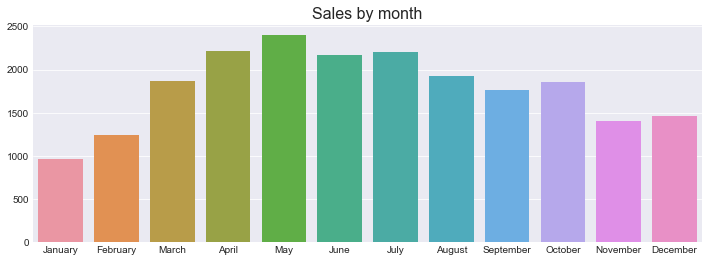

In [19]:
# graph the number of sales by month
# https://github.com/arseniyturin/dsc-1-final-project-online-ds-sp-000/blob/master/student.ipynb

months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_sales = []

for i in range(1,13):
    monthly_sales.append(sum(kc.date.dt.month == i))
    
plt.figure(figsize=(12,4))
sns.barplot(months, monthly_sales)
plt.title('Sales by month', fontdict={'fontsize': 16})
plt.show()

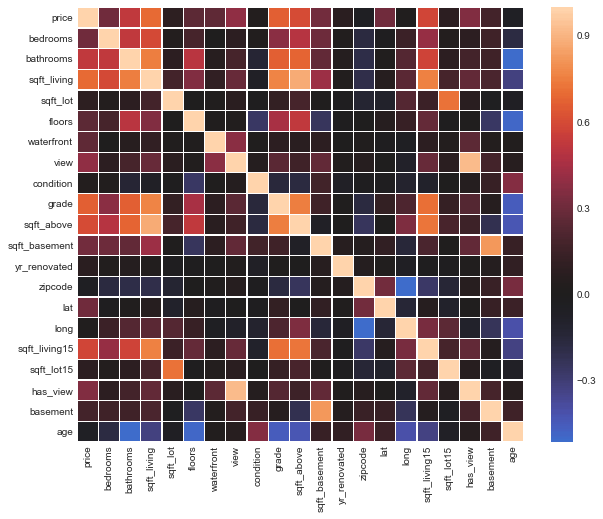

In [20]:
# Set up the matplotlib figure and generate a heatmap of the data
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(kc.corr(), center = 0, linewidths = .25);

In [21]:
# Let's look at the correlation between each of the predictor variables

kc.corr()['price'].sort_values(ascending=False)


price            1.000000
sqft_living      0.701082
grade            0.667881
sqft_above       0.603752
sqft_living15    0.584837
bathrooms        0.524394
view             0.396226
has_view         0.358334
sqft_basement    0.316376
bedrooms         0.312755
lat              0.308686
waterfront       0.261425
floors           0.254739
basement         0.176332
sqft_lot         0.089731
sqft_lot15       0.082552
yr_renovated     0.072575
condition        0.033973
long             0.023362
zipcode         -0.044598
age             -0.057070
Name: price, dtype: float64

A correlation is consider high if its absolute value is around 0.7 - 0.8.
Let's use 0.75 as a guide to see how many high correlations there are.

In [22]:
print (abs(kc.corr() > 0.75))

               price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price           True     False      False        False     False   False   
bedrooms       False      True      False        False     False   False   
bathrooms      False     False       True         True     False   False   
sqft_living    False     False       True         True     False   False   
sqft_lot       False     False      False        False      True   False   
floors         False     False      False        False     False    True   
waterfront     False     False      False        False     False   False   
view           False     False      False        False     False   False   
condition      False     False      False        False     False   False   
grade          False     False      False         True     False   False   
sqft_above     False     False      False         True     False   False   
sqft_basement  False     False      False        False     False   False   
yr_renovated

This shows a high correlation between sqft_lot and sqft_lot15.  Let's go ahead and
drop the sqft_lot15 variable

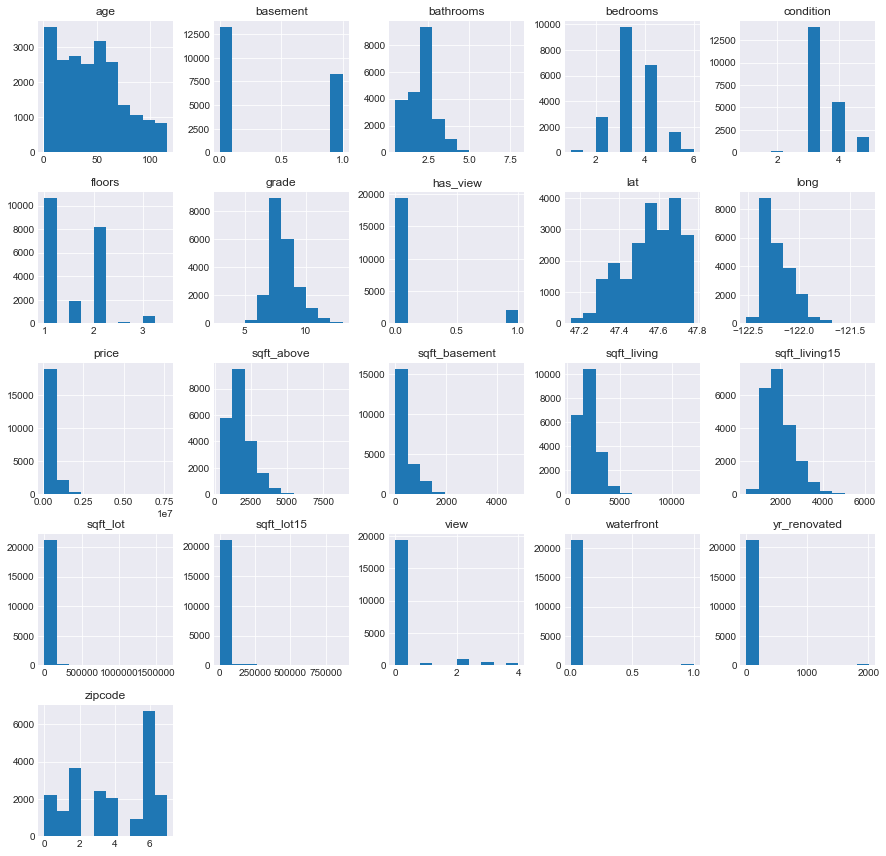

In [23]:
# Get an initial visualization of the data
# Note:  extra white space on either side of the graph indicates outliers which need to be removed
kc.hist(figsize=(15,15));

In [ ]:
# Some features have a high correlation with others. 
# sqft_living is highly correlated to bathrooms, sqft_above, &b grade
# latitude and longitude can be dropped because they provide basically the same information as zipcode.

drop_cols = ['sqft_living','lat', 'long']
kc = kc.drop(drop_cols, axis=1)

In [ ]:
# Normalize the data using log transformation
# the variables basement, age, has_view, yr_renovated cannot be log transformed due to their values of 0

import numpy as np
kc_log = pd.DataFrame([])

kc_log['price'] = np.log(kc.price)
kc_log['bathrooms'] = np.log(kc.bathrooms)
kc_log['bedrooms'] = np.log(kc.bedrooms)
kc_log['condition'] = np.log(kc.condition)
kc_log['age'] = np.log(kc.age)
kc_log['floors'] = np.log(kc.floors)
kc_log['grade'] = np.log(kc.grade)
kc_log['sqft_above'] = np.log(kc.sqft_above)
kc_log['sqft_lot'] = np.log(kc.sqft_lot)
kc_log['sqft_lot15'] = np.log(kc.sqft_lot15)

# look at the histograms of the transformed data
kc_log.hist(figsize = (15,15));

In [ ]:
# Convert categorical columns to numeric format with one-hot encoding

kc['bedrooms'] = kc.bedrooms.astype('category')
kc['bathrooms'] = kc.bathrooms.astype('category')
kc['floors'] = kc.floors.astype('category')
kc['condition'] = kc.condition.astype('category')
kc['grade'] = kc.grade.astype('category')
kc['has_view'] = kc.has_view.astype('category')
kc['waterfront'] = kc.waterfront.astype('category')
kc['yr_renovated'] = kc.yr_renovated.astype('category')
kc['basement'] = kc.basement.astype('category')



bed_dummies = pd.get_dummies(kc.bedrooms, prefix = 'bedrooms')
bath_dummies = pd.get_dummies(kc.bathrooms, prefix = 'bathrooms')
floors_dummies = pd.get_dummies(kc.floors, prefix = 'floors')
cond_dummies = pd.get_dummies(kc.condition, prefix = 'condition')
grade_dummies = pd.get_dummies(kc.grade, prefix = 'grade')
has_view_dummies = pd.get_dummies(kc.has_view, prefix = 'view')
water_dummies = pd.get_dummies(kc.waterfront, prefix = 'waterfront')
renov_dummies = pd.get_dummies(kc.yr_renovated, prefix = 'yr_renovated')
basement_dummies = pd.get_dummies(kc.basement, prefix = 'basement')
zip_dummies = pd.get_dummies(bins_zip, prefix = 'zip')


# combine the log transformed data with the categorical dummy variables
kc_final = pd.concat([kc_log, bed_dummies, bath_dummies, floors_dummies, cond_dummies, grade_dummies], axis=1)
kc_final = pd.concat([kc_final, has_view_dummies, water_dummies, basement_dummies, zip_dummies], axis=1 )


In [ ]:
# set the max_columns attribute in order to view all of the column names with the categorical data
pd.set_option('display.max_columns', None)
kc_final.head()